In [167]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [168]:
import numpy as np
import pandas as pd

In [169]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [170]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [171]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [172]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [173]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [174]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [175]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [176]:
# Design a query to retrieve the last 12 months of precipitation data and plot the resultst
meas_first = session.query(Measurement).first()
meas_first

In [177]:
# Calculate the date 1 year ago from the last data point in the database
meas_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a584cb1be0>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [178]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [179]:
# Perform a query to retrieve the data and precipitation scores
#I couldn't get this to run for dates greater than 12/31/17
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-12-31").\
    group_by(Measurement.date).all()
rain

[('2016-12-31', 0.01),
 ('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 

In [180]:
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-12-31,0.01
1,2017-01-01,0.00
2,2017-01-02,0.00
3,2017-01-03,0.00
4,2017-01-04,0.00


In [181]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_2017_df = rain_df.set_index("date")
rain_2017_df.head()

,prcp
date,
2016-12-31,0.01
2017-01-01,0.00
2017-01-02,0.00
2017-01-03,0.00
2017-01-04,0.00


In [182]:
# Sort the dataframe by date
rain_df.sort_values("date")

,date,prcp
0,2016-12-31,0.01
1,2017-01-01,0.00
2,2017-01-02,0.00
3,2017-01-03,0.00
4,2017-01-04,0.00
5,2017-01-05,0.00
6,2017-01-06,0.00
7,2017-01-07,0.00
8,2017-01-08,0.00
9,2017-01-09,0.00


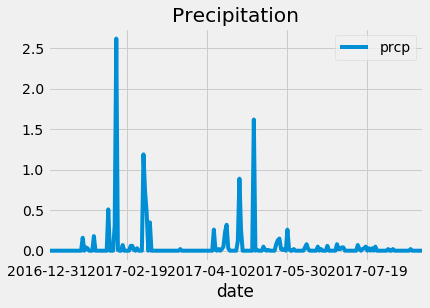

In [183]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_2017_df.plot()
plt.title("Precipitation")
plt.savefig("Precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [184]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,236.000000
mean,0.052161
std,0.233645
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,2.620000


![describe](Images/describe.png)

In [185]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

9

In [186]:
stations_first = session.query(Station).first()
stations_first

In [187]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [248]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#This section is not giving me any errors for my trip dates
most_active = active_station[0][0]
def calc_temps(start_date, end_date):
    tripdates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2017-09-01",\
        Measurement.date <= "2017-09-08").all()

In [ ]:
# Choose the station with the highest number of temperature observations.
most_active
tobs = session.query(Measurement.tobs).filter(Measurement.date >= "2017-01-01", Measurement.date <= "2017-12-31", Measurement.station == most_active).all()
tobs_df = pd.DataFrame(tobs)
tobs_df.tail()

In [ ]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.tobs).filter(Measurement.date >= "2017-01-01", Measurement.date <= "2017-12-31", Measurement.station == most_active).all
plt.hist(tobs_df["tobs"], bins=12)
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    
    ##"""TMIN, TAVG, and TMAX for a list of dates.
    
   ## Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
   ## Returns:
        TMIN, TAVE, and TMAX
    """
    
   ## return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

### function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [272]:
#COULDN'T GET THIS TO RUN
def calc_temps(start_date, end_date):
    tripdates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2017-09-01",\
        Measurement.date <= "2017-09-08").all()
max_temp = tripdates_df["tobs"].max()
min_temp = tripdates_df["tobs"].min()
mean_temp = tripdates_df["tobs"].mean()
plt.bar(1, mean_temp, year= max_temp - min_temp, tick_label="")    
plt.figure(figsize=(3,6))  
calc_temps("2017-09-01", "2017-09-08")  
max_temp = tripdates_df["tobs"].max()
plt.show() 

NameError: name 'tripdates_df' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
##NOT DONE

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
##NOT DONE

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
##NOT DONE


## Optional Challenge Assignment

In [267]:
##OPTIONAL CHALLENGE - NOT DONE
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [268]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [269]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [270]:
# Plot the daily normals as an area plot with `stacked=False`
